# Neural Networks with Keras

Example notebook for experimenting with:
* Creating and fitting a simple neural network
* Use of Keras high-level API 

@Ricardo Almeida

In [1]:
# Additional requirements
# conda install keras tensorflow

In [17]:
from keras.layers import Dense, Input
from keras.models import Sequential

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import RocCurveDisplay
from sklearn.preprocessing import StandardScaler 

In [18]:
RANDOM_SEED = 7657

TEST_SIZE=0.20

## Dataset

#### Loading dataset

California housing dataset

In [19]:
housing = fetch_california_housing()

In [20]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [21]:
housing.target_names

['MedHouseVal']

In [22]:
housing.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [23]:
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

#### Feature plotting

In [24]:
data = pd.DataFrame(data=housing.data, columns=housing.feature_names)
data['target'] = housing.target

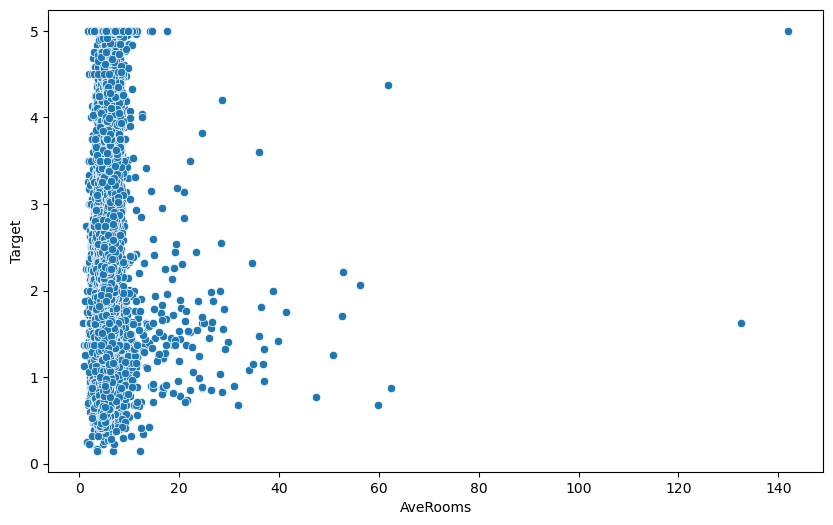

In [25]:
feature = 'AveRooms'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=feature, y='target', data=data)
plt.xlabel(feature)
plt.ylabel('Target')
plt.show()

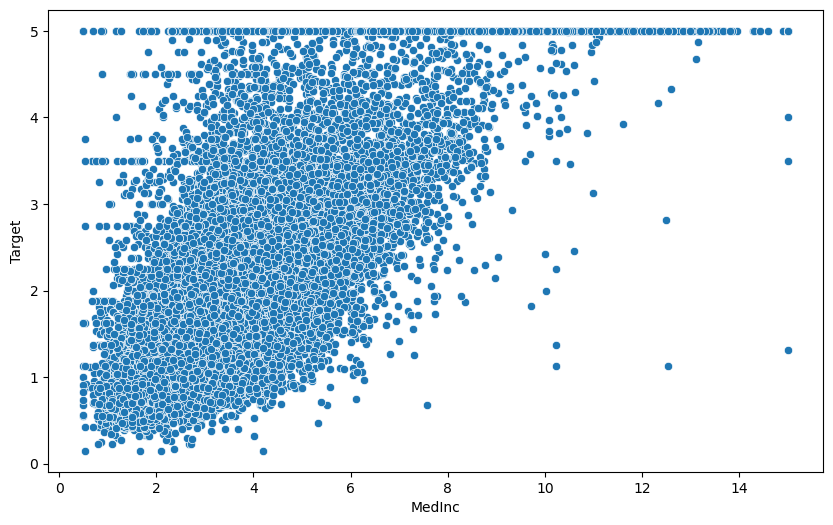

In [26]:
feature = 'MedInc'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=feature, y='target', data=data)
plt.xlabel(feature)
plt.ylabel('Target')
plt.show()

In [27]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(housing.data)

In [28]:
X_train, X_dev, y_train, y_dev = train_test_split(
    X_scaled, housing.target, random_state=RANDOM_SEED, test_size=TEST_SIZE)

## Neural network

#### Create Keras model

A fully connected network with three layers:
- the first layer has 8 neurons and RELU as activation function
- second hidden layer has 12 neurons and RELU activation function
- output layer, 1 unit and activation as Linear, because it is a regression problem (we would use Sigmoid for classification)

In [35]:
model = Sequential()
model.add(Input((8,)))
model.add(Dense(8, activation="relu"))
model.add(Dense(12, activation="relu"))
model.add(Dense(1, activation="linear"))

In [41]:
model = Sequential([
    Input((8,)),
    Dense(8, activation="relu"),
    Dense(12, activation="relu"),
    Dense(1, activation="linear")
])

#### Compile the Keras model

Specifying the **Loss Function**, **Optimizer** and **Metrics** to display

In [42]:
model.compile(loss="mean_squared_error", optimizer="adam")

#### Model training

Epoch: a single pass through all the rows in the training dataset

Batch size: number of samples considered by the model on updating the weights

In [43]:
history = model.fit(X_train, y_train, validation_data=(X_dev, y_dev), epochs=60, batch_size=32)

Epoch 1/60
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step - loss: 3.0740 - val_loss: 0.7586
Epoch 2/60
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 326us/step - loss: 0.6752 - val_loss: 0.6085
Epoch 3/60
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 332us/step - loss: 0.5607 - val_loss: 0.5273
Epoch 4/60
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 328us/step - loss: 0.4938 - val_loss: 0.4717
Epoch 5/60
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 328us/step - loss: 0.4436 - val_loss: 0.4390
Epoch 6/60
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 331us/step - loss: 0.3978 - val_loss: 0.4255
Epoch 7/60
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 328us/step - loss: 0.3909 - val_loss: 0.4123
Epoch 8/60
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 332us/step - loss: 0.3756 - val_loss: 0.4101
Epoch 9/60
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 332us/step - loss: 0.3720 - val_loss: 0.4032
Epoch 10/60
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 329us/step - loss: 0.3843 - val_loss: 0.3982
Epoch 11/60
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 330us/step - loss: 0.3627 - val_loss: 0.3973
Epoch 12/60
516/516 ━━━━━━━━━━

In [44]:
mse_dev = model.evaluate(X_dev, y_dev)
print(f"\n Mean Squared Error (MSE) on Dev dataset: {mse_dev:.2f}")

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 215us/step - loss: 0.3564

 Mean Squared Error (MSE) on Dev dataset: 0.34


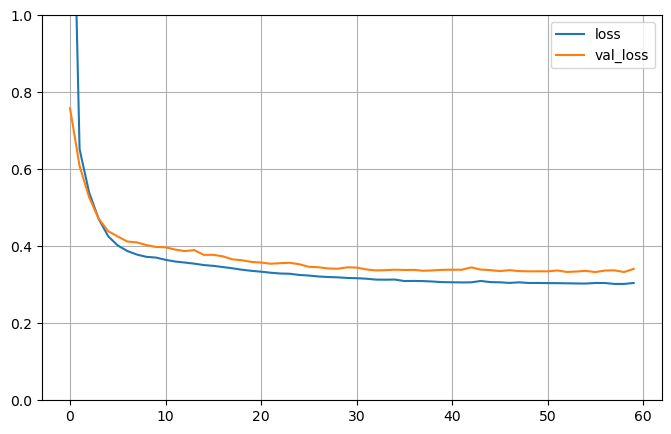

In [45]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()